### LATIHAN 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def GenerateDatasetSimple(beta, n, std_dev):
    x = np.random.random_sample(n) * 100
    e = np.random.randn(n) * std_dev
    y = x * beta + e
    return x.reshape(n, 1), y

In [54]:
X, y = GenerateDatasetSimple(10, 50, 100)

# Take the first 40 samples to train, and the last 10 to test
X_train = X[:-10]
y_train = y[:-10]

X_test = X[-10:]
y_test = y[-10:]

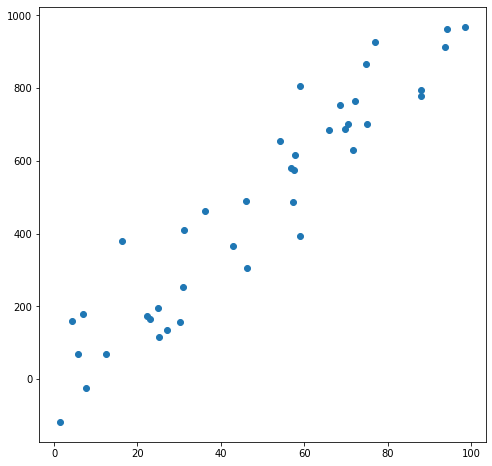

In [55]:
plt.figure(figsize=[8,8])
plt.scatter(X_train, y_train)
plt.show()

In [56]:
from sklearn import linear_model
linearRegression = linear_model.LinearRegression()

linearRegression.fit(X_train, y_train)
print('Coefficients: \n', linearRegression.coef_)

y_pred = linearRegression.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [10.18609862]
Mean squared error: 5744.44
Variance score: 0.89


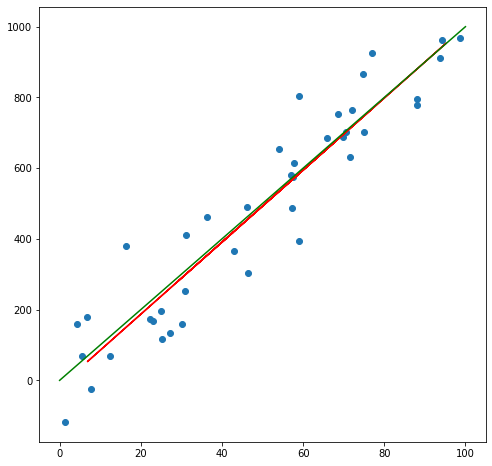

In [58]:
plt.figure(figsize=[8,8])
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
X_actual = np.array([0, 100])
beta = 10
y_actual = X_actual * beta
plt.plot(X_actual, y_actual, color='green')
plt.show()

### TUGAS 

In [62]:
import pandas as pd

avocadoData = pd.read_csv('avocado.csv')
avocadoData.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [203]:
feature = []

for i in avocadoData:
    if i != 'AveragePrice' and i!= 'Unnamed: 0' and i != 'Date' and i!= 'type' and i != 'year' and i != 'region':
        feature.append(i)
        
X = pd.read_csv('avocado.csv', usecols=feature)
y = avocadoData.AveragePrice

In [204]:
from sklearn import linear_model
linearRegression = linear_model.LinearRegression()

In [205]:
import pandas
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

r2_scores = []
MSE_scores = []
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    linearRegression.fit(X_train, y_train)
    y_pred = linearRegression.predict(X_test)
    r2_scores.append(r2_score(y_pred, y_test))
    MSE_scores.append(mean_squared_error(y_pred, y_test))

In [206]:
print("R2:\n",r2_scores,"\n")
print("MSE:\n",MSE_scores,"\n")

R2:
 [-14.52606846420106, -5.266260211369468, -3.29285557015199, -60706.86398870731, -0.19297618836126107] 

MSE:
 [0.1871143467350883, 0.15260744609805474, 0.13354236835740435, 0.17276318198278343, 2.3221332347862913] 



### KESIMPULAN 

Linear Regression secara umum yaitu mencari garis yang paling cocok dengan data. Suatu garis dikatakan cocok jika garis
tersebut memiliki nilai error yang paling kecil pada hasil prediksi. Error merupakan jarak suatu titik ke garis.